In [1]:
# Importing packages
import pandas as pd
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))
from wordcloud import WordCloud
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\neha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Loading Data 
data = pd.read_csv("Dataset/IMDB Dataset.csv")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
# Remove punctuations
def remove_punct(text):
    text = text.lower()
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

data["review"]= data["review"].apply(remove_punct,1)

In [4]:
# Tokenize and remove stop words
def tokenize_remove_stopwords(text):
    
    word_tokens = word_tokenize(text) # tokenization
    
    # remove stopwords
    filtered_sentence = []
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    return filtered_sentence

data["review"]= data["review"].apply(tokenize_remove_stopwords,1)

In [5]:
# Convert list to string
def convert_string(lst):
    lst = lst
    return ' '.join(lst)
data["review"]= data["review"].apply(convert_string,1)

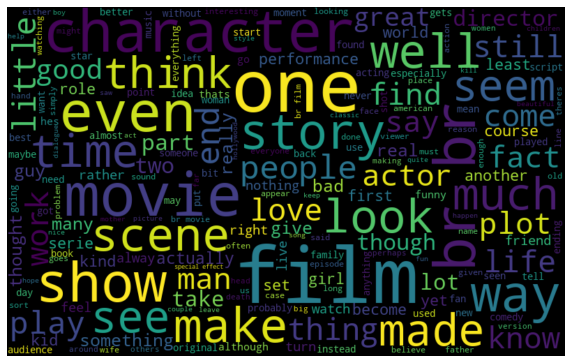

In [6]:
# Word Cloud for all reviews
all_words = " ".join([text for text in data["review"]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

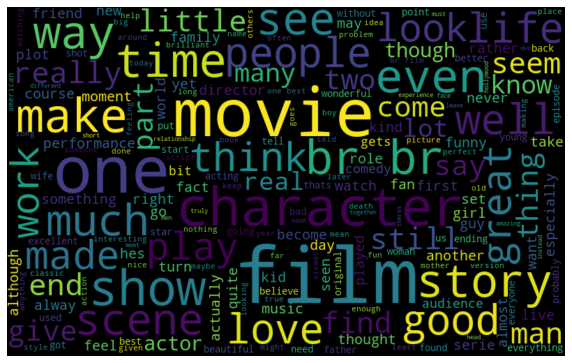

In [7]:
# Word Cloud for positive reviews
positive_words = " ".join([text for text in data["review"][data["sentiment"]=="positive"]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Word Cloud for negative reviews
negative_words = " ".join([text for text in data["review"][data["sentiment"]=="negative"]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()